In [56]:
from ultralytics import YOLO
import os
import tqdm
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
from glob import glob

In [57]:
CROP_FACTOR = 2.0

model = YOLO('best.pt')  

In [55]:
def save_crop(path):
    pred = model.predict(path, verbose = False)[0]

    boxes = pred.boxes.numpy()
    if len(boxes.cls) == 0:
        return
    
    best_arg = np.argsort(boxes.cls, 0)[0]
    x,y,w,h = boxes.xywh[best_arg]

    orig_img = Image.open(pred.path)

    left = max(int(x - w/2*CROP_FACTOR),0)
    right = min(int(x + w/2*CROP_FACTOR), orig_img.size[0])
    bottom = max(int(y - h/2*CROP_FACTOR),0)
    top = min(int(y + h/2*CROP_FACTOR), orig_img.size[1])


    cropped_img = orig_img.crop((left,bottom, right, top))
    cropped_img.save(path.replace(".png","_cropped.png"))

In [3]:
# preds = model.predict("data/train/*")
preds = []
preds.extend(model.predict(glob("data/test/*")[:100]))


0: 192x256 (no detections), 20.8ms
1: 192x256 1 pokeomon, 20.8ms
2: 192x256 1 pokeomon, 20.8ms
3: 192x256 1 pokeomon, 20.8ms
4: 192x256 1 pokeomon, 20.8ms
5: 192x256 (no detections), 20.8ms
6: 192x256 2 pokeomons, 20.8ms
7: 192x256 1 pokeomon, 20.8ms
8: 192x256 1 pokeomon, 20.8ms
9: 192x256 1 pokeomon, 20.8ms
10: 192x256 1 pokeomon, 20.8ms
11: 192x256 1 pokeomon, 20.8ms
12: 192x256 1 pokeomon, 20.8ms
13: 192x256 2 pokeomons, 20.8ms
14: 192x256 1 pokeomon, 20.8ms
15: 192x256 1 pokeomon, 20.8ms
16: 192x256 1 pokeomon, 20.8ms
17: 192x256 1 pokeomon, 20.8ms
18: 192x256 1 pokeomon, 20.8ms
19: 192x256 1 pokeomon, 20.8ms
20: 192x256 2 pokeomons, 20.8ms
21: 192x256 2 pokeomons, 20.8ms
22: 192x256 1 pokeomon, 20.8ms
23: 192x256 1 pokeomon, 20.8ms
24: 192x256 1 pokeomon, 20.8ms
25: 192x256 2 pokeomons, 20.8ms
26: 192x256 2 pokeomons, 20.8ms
27: 192x256 1 pokeomon, 20.8ms
28: 192x256 1 pokeomon, 20.8ms
29: 192x256 1 pokeomon, 20.8ms
30: 192x256 1 pokeomon, 20.8ms
31: 192x256 1 pokeomon, 20.8ms
3

In [14]:
strange = [i for i in preds if i.boxes.cls.shape[0] != 1]


In [15]:
s = strange[0]

for s in tqdm.tqdm(strange):
    img = Image.fromarray(s.orig_img).resize((256,256))

    path = os.path.basename(s.path).replace(".png","")

    img.save(f"data/to_correct/images/{path}.png")
    s.save_txt(f"data/to_correct/images/{path}.txt", save_conf=True)


100%|██████████| 24/24 [00:00<00:00, 24.83it/s]


In [16]:
for i in glob("data/to_correct/*/*.txt"):
    if "classes" in i:
        continue
    with open(i, "r") as f:
        data = f.readlines()
    
    if len(data):
    
        data = " ".join(sorted(data, key=lambda x: float(x.split(" ")[-1]), reverse=True)[0][:-1])
    
    
    with open(i, "w") as f:
        
        if data:
            f.write(data[0][:-1])
        

In [17]:
for i in glob("data/to_correct/*/*.txt"):
    if "classes" in i:
        continue
    with open(i, "r") as f:
        data = f.readlines()
        assert len(data) < 1
        if len(data):
            assert len(data[0].split(" ")) == 5

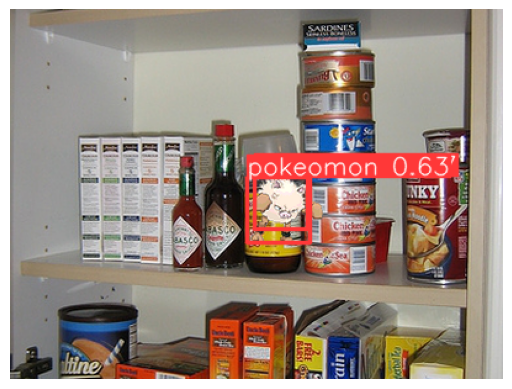

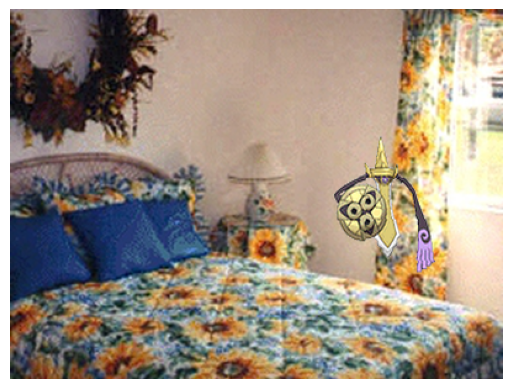

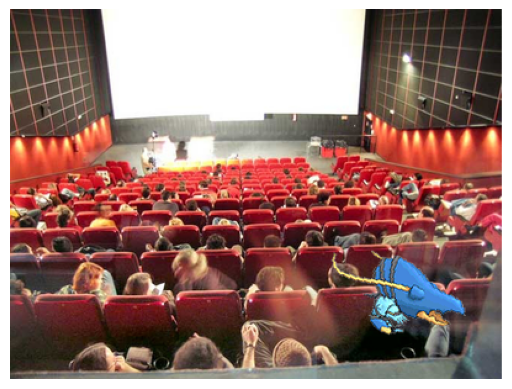

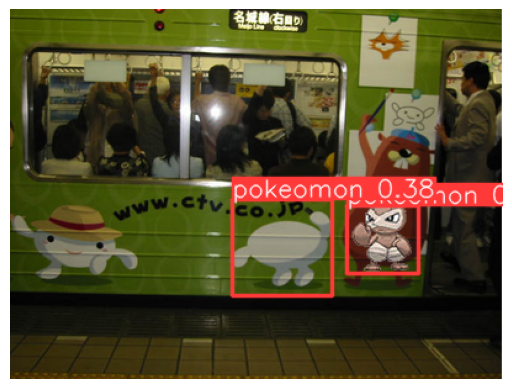

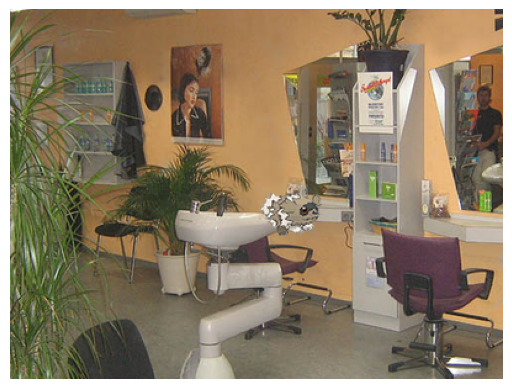

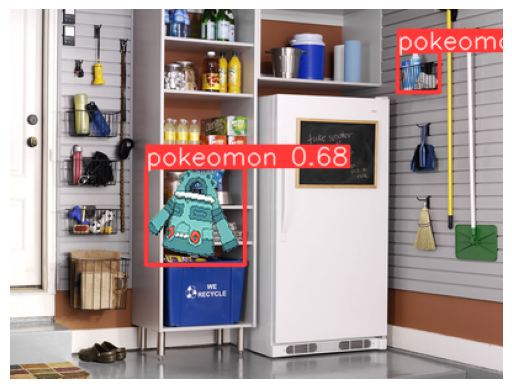

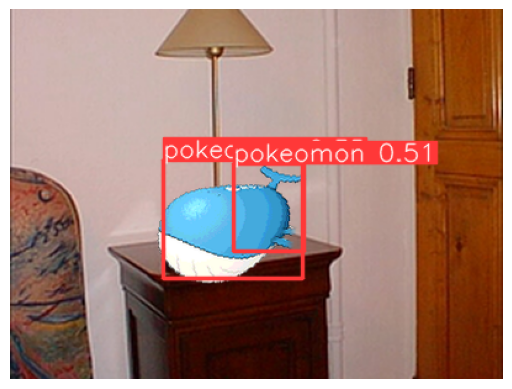

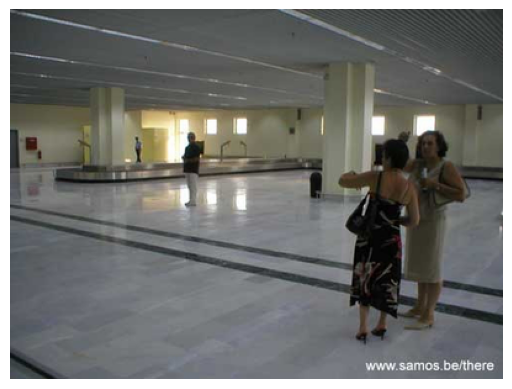

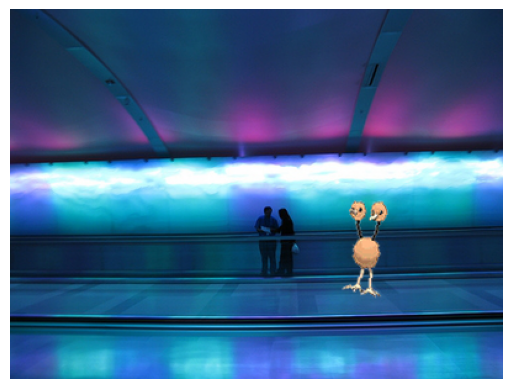

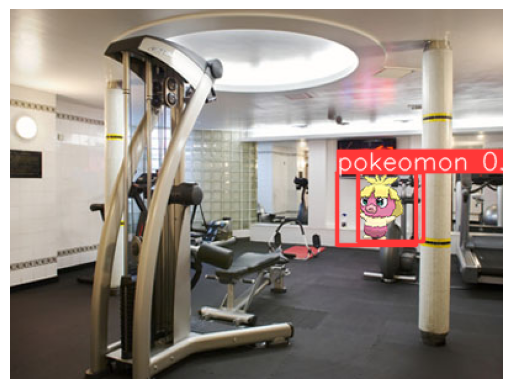

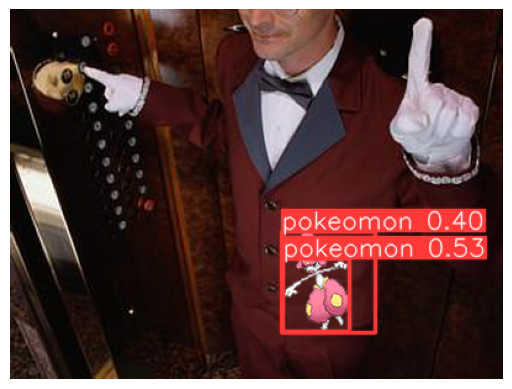

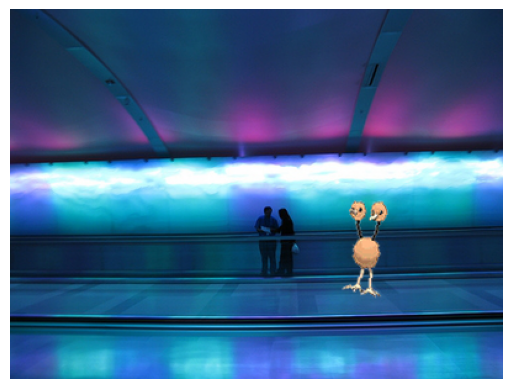

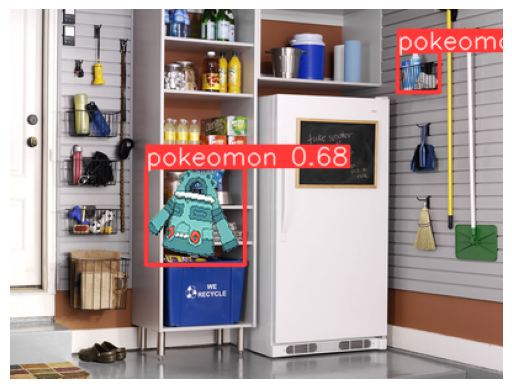

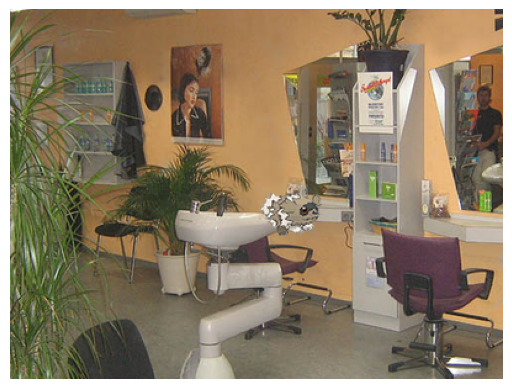

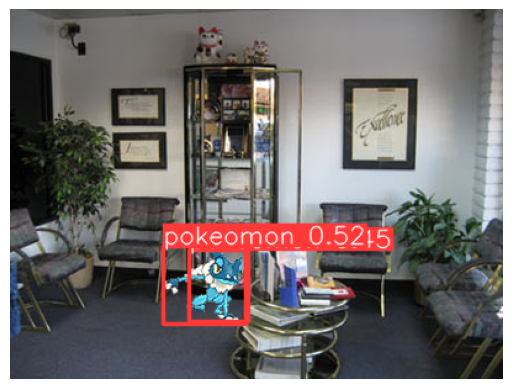

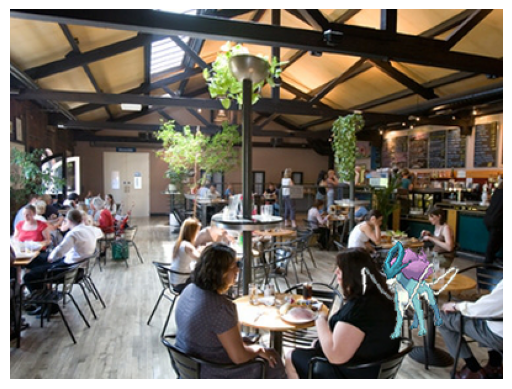

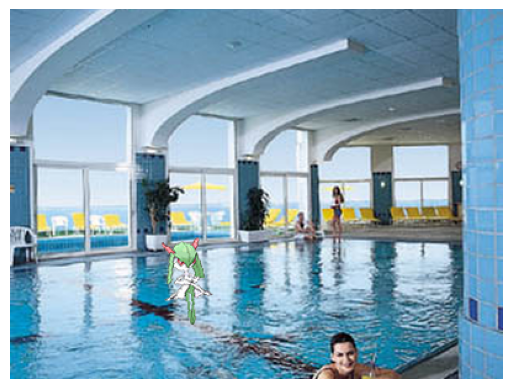

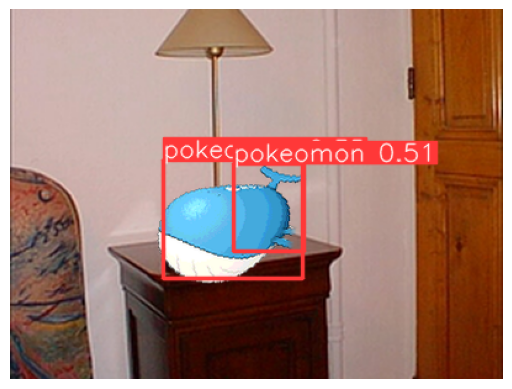

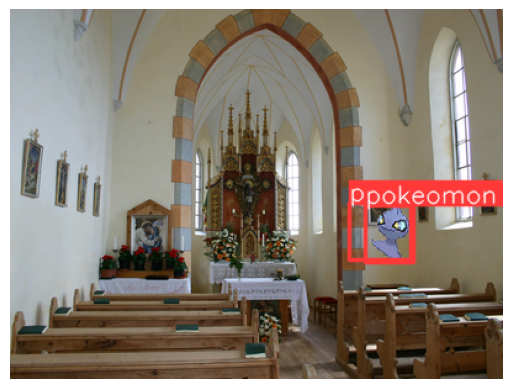

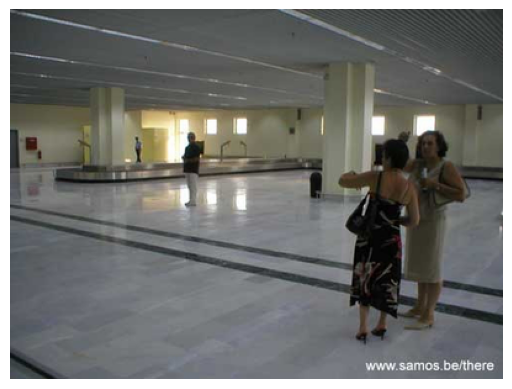

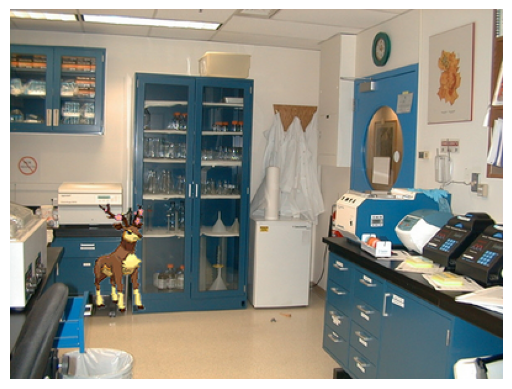

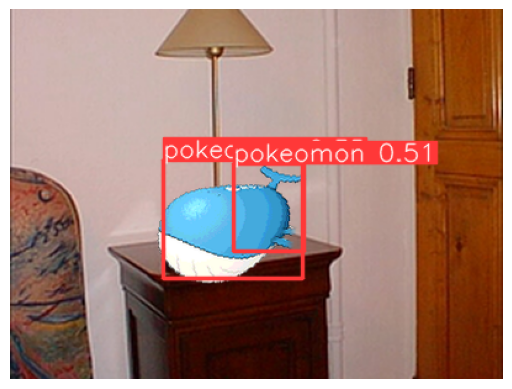

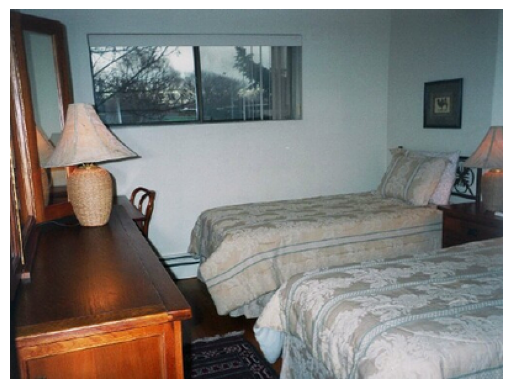

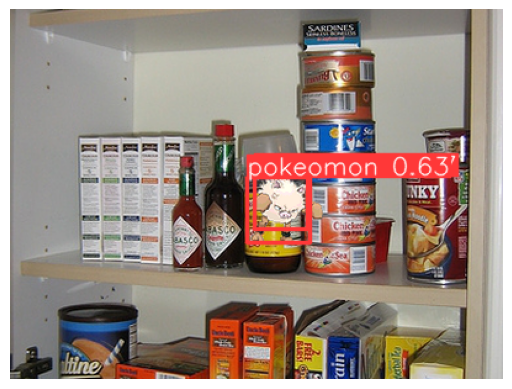

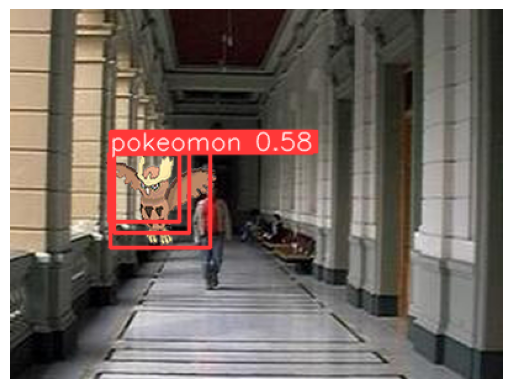

In [22]:
correct = [i for i in preds if i.boxes.cls.shape[0] == 1]
import numpy as np
import random
import cv2
for i in random.choices(strange,k = 25):
    plt.imshow(cv2.cvtColor(i.plot(), cv2.COLOR_RGB2BGR))
    plt.axis("off")
    plt.show()

In [21]:
import cv2
import matplotlib.pyplot as plt


def plot_img(img_path, fl):
    img = cv2.imread(img_path)
    print("hey")
    dh, dw, _ = img.shape


    data = fl.readlines()

    for dt in data:

        # Split string to float
        _, x, y, w, h = map(float, dt.split(' '))

        # Taken from https://github.com/pjreddie/darknet/blob/810d7f797bdb2f021dbe65d2524c2ff6b8ab5c8b/src/image.c#L283-L291
        # via https://stackoverflow.com/questions/44544471/how-to-get-the-coordinates-of-the-bounding-box-in-yolo-object-detection#comment102178409_44592380
        l = int((x - w / 2) * dw)
        r = int((x + w / 2) * dw)
        t = int((y - h / 2) * dh)
        b = int((y + h / 2) * dh)
        
        if l < 0:
            l = 0
        if r > dw - 1:
            r = dw - 1
        if t < 0:
            t = 0
        if b > dh - 1:
            b = dh - 1

        cv2.rectangle(img, (l, t), (r, b), (0, 0, 255), 1)
    plt.imshow(img)
    
    plt.show()
    
plot_img("test.jpg", open("test.txt", ))

hey


ValueError: too many values to unpack (expected 5)